In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import psutil


In [2]:
import os
def filename_check(filename):
    if filename.endswith('.csv'):
        print("Расширение файла подходит.")
    else:
        print("Не то расширение файла.")
        
def emptyfile_check(file):
    if file.empty:
        print("Файл пустой.")
    else:
        print("Файл не пустой, данные в порядке.")
        
def emptycells_check(data):
    if data.isnull().values.any():
        print("В файле пустые ячейки.")
    else:
        print("Все в порядке, в файле нет пустых ячеек.")
        
def memory_treshold(filename):
    file_size = os.path.getsize(filename)
    svmem = psutil.virtual_memory()
    if svmem.available >= file_size:
        print(f"Достаточно оперативной памяти для обработки файла размером {file_size} байт.")
    else:
        print(f"Недостаточно оперативной памяти для обработки файла размером {file_size} байт.")

In [3]:
filename = r'C:\Users\79263\Desktop\Cleaned_ships_data.csv'
filename_check(filename)
memory_treshold(filename)
df = pd.read_csv(filename)
emptyfile_check(df)
emptycells_check(df)
df.head()

Расширение файла подходит.
Достаточно оперативной памяти для обработки файла размером 10701 байт.
Файл не пустой, данные в порядке.
Все в порядке, в файле нет пустых ячеек.


,Company_Name,ship_name,built_year,gt,dwt,length,width
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
1,MSC LORETO,Container Ship,2023,236184,240000,399,60
2,MSC FEBE,Container Ship,2019,232618,228149,400,62
3,MSC ARINA,Container Ship,2019,228741,228111,400,61
4,EVER GOVERN,Container Ship,2019,219688,198937,400,59


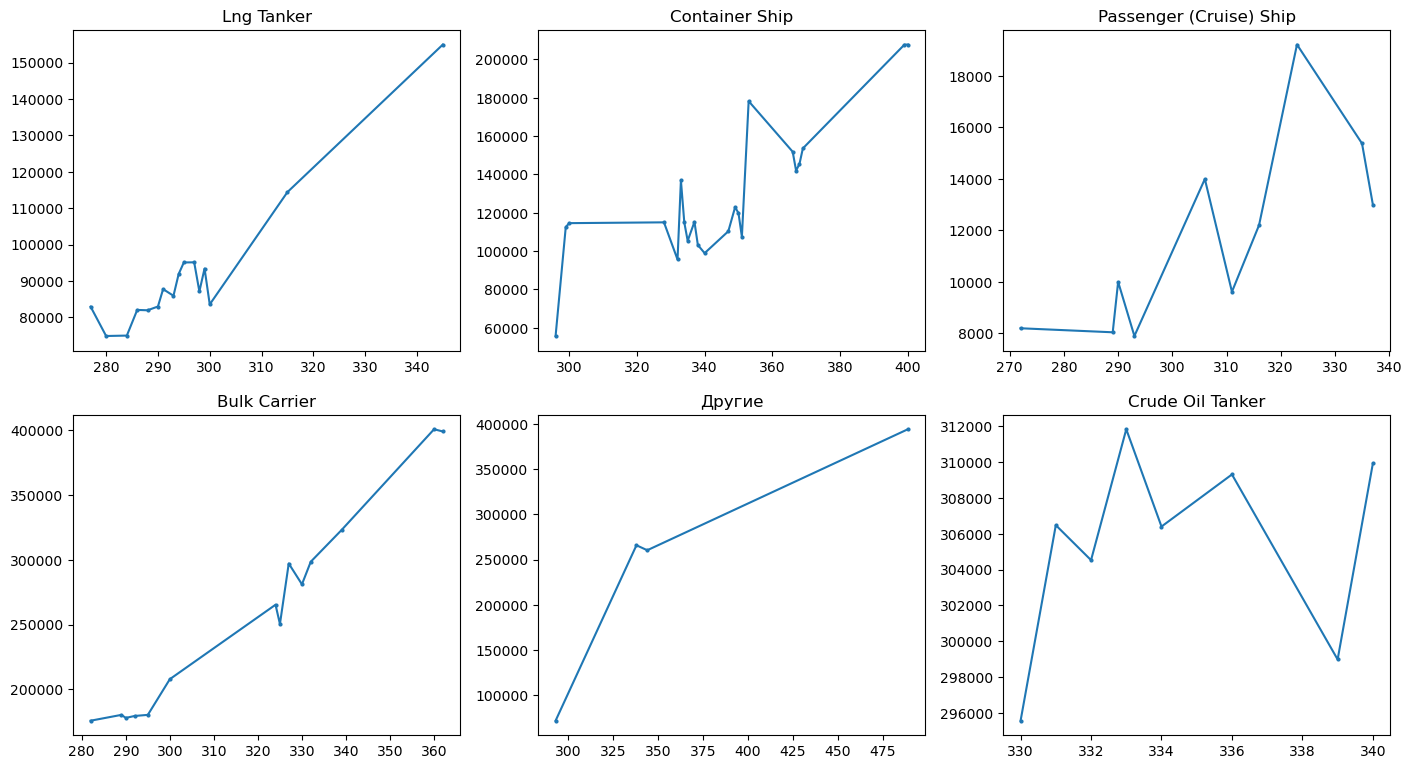

In [18]:
def func(df, string):
    df = df.sort_values(by='length')
    length_and_dwt = [df['length'].tolist(), df['dwt'].tolist()]
    ship_dwt = []
    ship_length = []
    ship_length.append(length_and_dwt[0][0])
    sum_dwt = length_and_dwt[1][0]
    count = 1

    for i in range(1, len(length_and_dwt[0])):
        if length_and_dwt[0][i] == ship_length[-1]:
            count += 1
            sum_dwt += length_and_dwt[1][i]
        else:
            ship_dwt.append(sum_dwt / count)
            count = 1
            sum_dwt = length_and_dwt[1][i]
            ship_length.append(length_and_dwt[0][i])

    ship_dwt.append(sum_dwt / count)
    return ship_length, ship_dwt


ship_types = df['ship_name'].tolist()
ship_types = list(set(ship_types))
plt.figure(figsize=(17,10))
plt.subplots_adjust(top = 1.2)
for i, string in enumerate(ship_types):
    plt.subplot(3,3,i+1)
    data1 = df
    data1 = data1.loc[df['ship_name']==string]
    ship_length, ship_dwt = func(data1, string)
    plt.plot(ship_length, ship_dwt, marker='o', linestyle='-', markersize=2) #
    plt.title(f"{string.replace('_','').title()}")



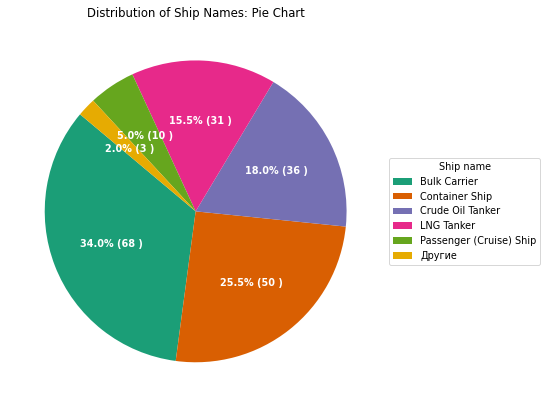

In [6]:
ship_counts = df['ship_name'].value_counts()

threshold = 10  # порог для объединения категорий
categories_to_combine = ship_counts[ship_counts < threshold].index
df['ship_name'] = df['ship_name'].apply(lambda x: 'Другие' if x in categories_to_combine else x)
ship_counts_updated = df['ship_name'].value_counts()

mypie = df.groupby('ship_name').size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi=70)
counts = mypie['counts']
categories = mypie['ship_name']

def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(counts, 
                                   autopct=lambda pct: func(pct, counts),
                                   textprops=dict(color="w"), 
                                   colors=plt.cm.Dark2.colors,
                                   startangle=140)
ax.legend(wedges, categories, title="Ship name", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Distribution of Ship Names: Pie Chart")
plt.show()

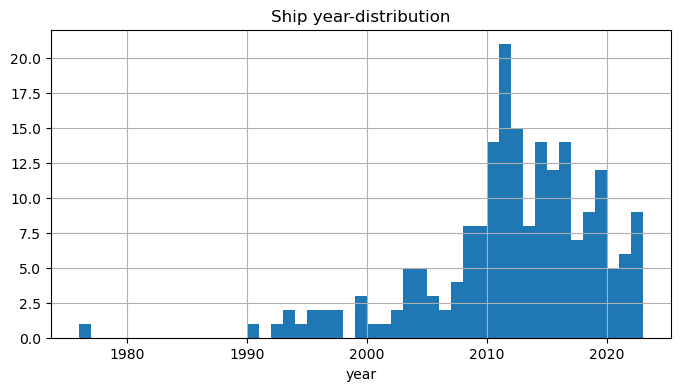

In [7]:
built_years = df['built_year'].tolist()
df['built_year'].hist(figsize=(8, 4), bins=max(built_years)-min(built_years));
plt.xlabel('year')

plt.title("Ship year-distribution");

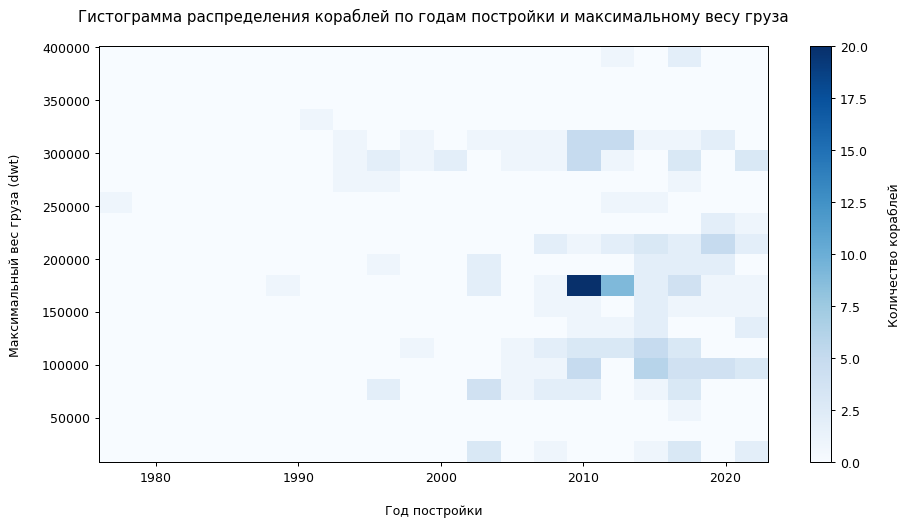

In [8]:
n_bins = 20
dwt_bins = np.linspace(df['dwt'].min(), df['dwt'].max(), n_bins)

plt.figure(figsize=(12, 6), dpi=90)
plt.hist2d(df['built_year'], df['dwt'], bins=[n_bins, n_bins], cmap='Blues')

plt.xlabel('\nГод постройки')
plt.ylabel('Максимальный вес груза (dwt)\n')
plt.title('Гистограмма распределения кораблей по годам постройки и максимальному весу груза\n')

cbar = plt.colorbar()
cbar.set_label('\nКоличество кораблей')

plt.show()


In [9]:
#C:\Users\79263\Desktop\IRIS.csv
filename2 = r'C:\Users\79263\Desktop\IRIS.csv'
filename_check(filename2)
df_2 = pd.read_csv(filename2)
memory_treshold(filename2)
df3 = pd.read_csv(filename2)
emptyfile_check(df_2)
emptycells_check(df_2)
df_2.head()

Расширение файла подходит.
Достаточно оперативной памяти для обработки файла размером 4617 байт.
Файл не пустой, данные в порядке.
Все в порядке, в файле нет пустых ячеек.


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Figure size 700x560 with 0 Axes>

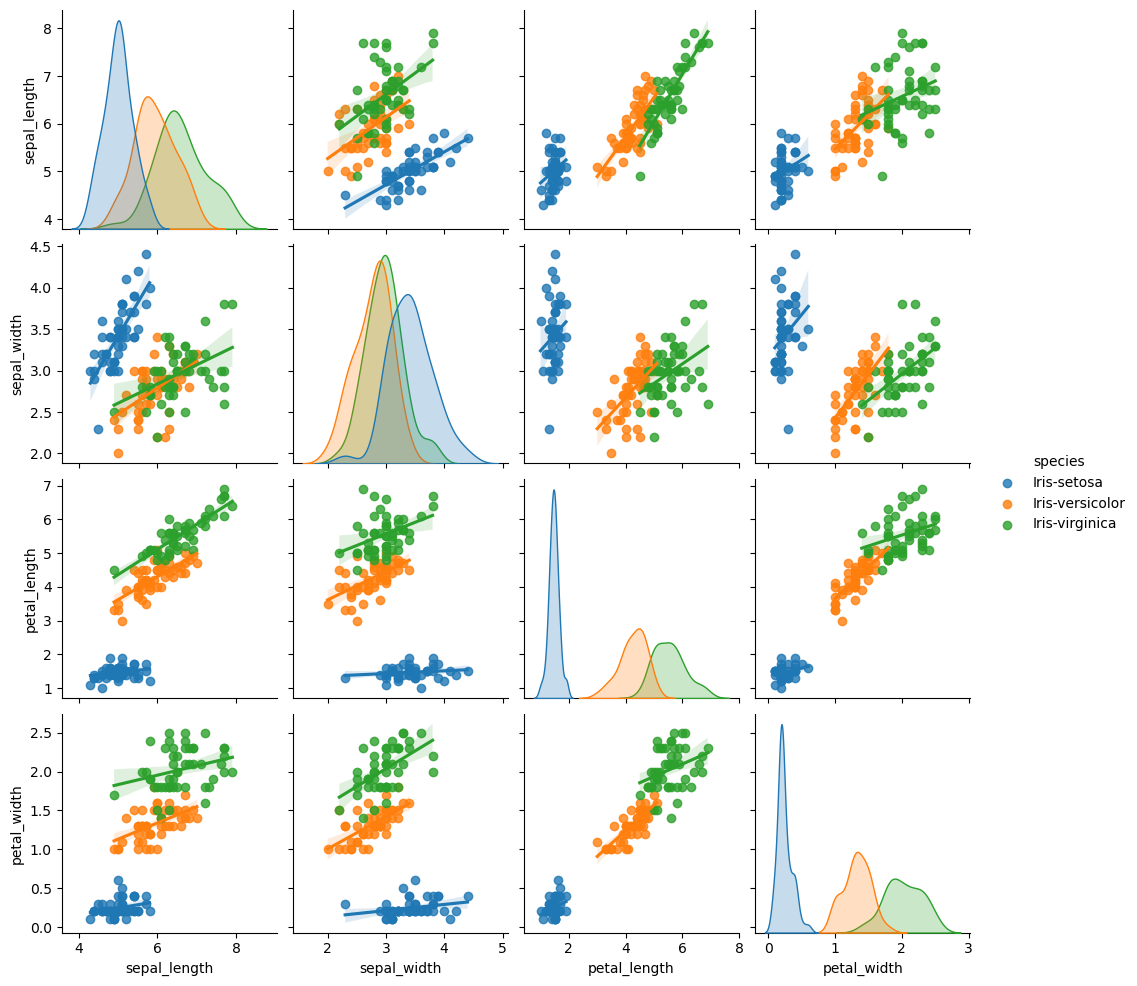

In [10]:
plt.figure(figsize=(10,8), dpi= 70)
sns.pairplot(df_2, kind="reg", hue="species")
plt.show()

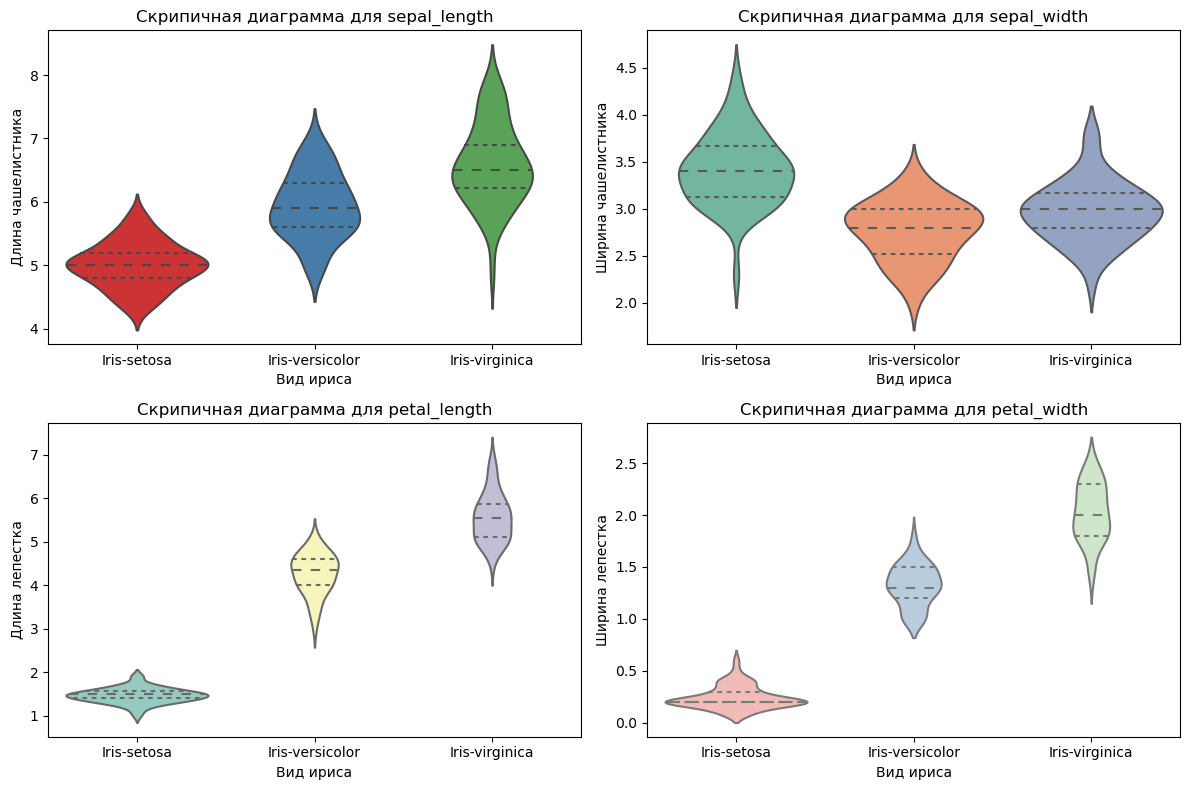

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.violinplot(x='species', y='sepal_length', data=df_2, inner='quartile', palette='Set1', split=True, ax=axes[0, 0])
axes[0, 0].set_title('Скрипичная диаграмма для sepal_length')
axes[0, 0].set_xlabel('Вид ириса')
axes[0, 0].set_ylabel('Длина чашелистника')

sns.violinplot(x='species', y='sepal_width', data=df_2, inner='quartile', palette='Set2', split=True, ax=axes[0, 1])
axes[0, 1].set_title('Скрипичная диаграмма для sepal_width')
axes[0, 1].set_xlabel('Вид ириса')
axes[0, 1].set_ylabel('Ширина чашелистника')

sns.violinplot(x='species', y='petal_length', data=df_2, inner='quartile', palette='Set3', split=True, ax=axes[1, 0])
axes[1, 0].set_title('Скрипичная диаграмма для petal_length')
axes[1, 0].set_xlabel('Вид ириса')
axes[1, 0].set_ylabel('Длина лепестка')

sns.violinplot(x='species', y='petal_width', data=df_2, inner='quartile', palette='Pastel1', split=True, ax=axes[1, 1])
axes[1, 1].set_title('Скрипичная диаграмма для petal_width')
axes[1, 1].set_xlabel('Вид ириса')
axes[1, 1].set_ylabel('Ширина лепестка')

plt.tight_layout()

plt.show()


In [12]:
# Task 2
filename3 = r'C:\Users\79263\Desktop\heart.csv'
filename_check(filename3)
df3 = pd.read_csv(filename3)
memory_treshold(filename3)
df3 = pd.read_csv(filename3)
emptyfile_check(df3)
emptycells_check(df3)
df3.head()

Расширение файла подходит.
Достаточно оперативной памяти для обработки файла размером 35921 байт.
Файл не пустой, данные в порядке.
Все в порядке, в файле нет пустых ячеек.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Unique Chest Pain Types: ['ATA' 'NAP' 'ASY' 'TA']


<Figure size 1000x600 with 0 Axes>

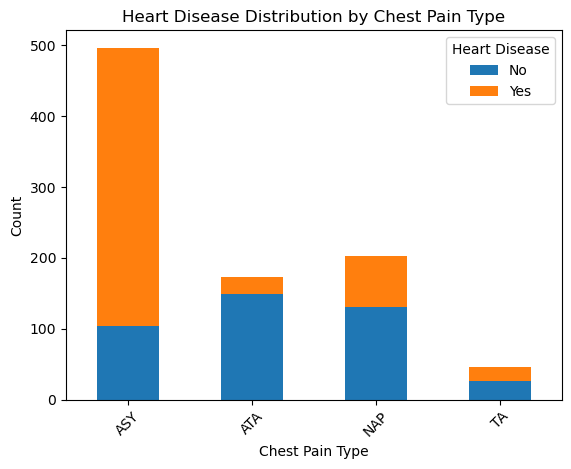

In [13]:
chest_pain_types = df3['ChestPainType'].unique()
print("Unique Chest Pain Types:", chest_pain_types)
chest_pain_heart_disease_counts = df3.groupby(['ChestPainType', 'HeartDisease']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
chest_pain_heart_disease_counts.plot(kind='bar', stacked=True)
plt.title('Heart Disease Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

Этот график предназначен для визуализации распределения заболевания сердца (Heart Disease) в зависимости от типа боли в груди (Chest Pain Type).
Можно увидеть, как разные типы боли в груди связаны с наличием или отсутствием заболевания сердца.

Оси графика следующие:

По горизонтали (ось X) расположены различные типы боли в груди.
По вертикали (ось Y) отображается количество случаев (число), и она представлена в форме накопленной столбчатой диаграммы.
Каждый столбец на графике представляет собой стек из двух частей, которые обозначают наличие и отсутствие заболевания сердца. График позволяет сравнить распределение заболевания сердца для разных типов боли в груди и определить, есть ли связь между типом боли и наличием заболевания сердца.
- ASY (Asymptomatic)
- NAP (Non-Anginal Pain)
- ATA (Atypical Angina)
- TA (Typical Angina)

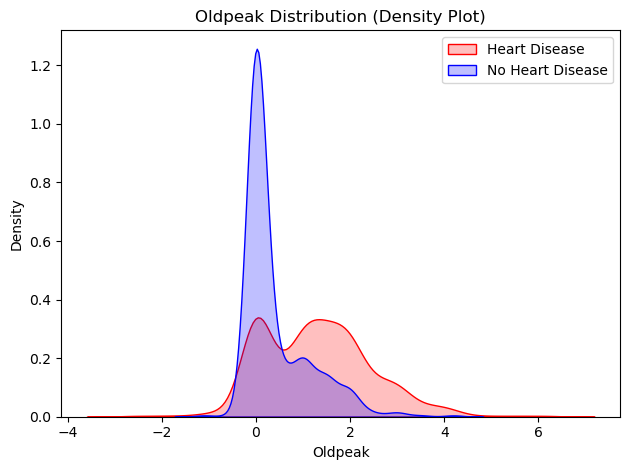

In [14]:
oldpeak_heart_disease = df3[df3['HeartDisease'] == 1]['Oldpeak']
oldpeak_no_heart_disease = df3[df3['HeartDisease'] == 0]['Oldpeak']
sns.kdeplot(oldpeak_heart_disease, color='red', label='Heart Disease', fill=True)
sns.kdeplot(oldpeak_no_heart_disease, color='blue', label='No Heart Disease', fill=True)

plt.title('Oldpeak Distribution (Density Plot)')
plt.xlabel('Oldpeak')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


(Density Plot) помогает понять, как распределены значения переменной "Oldpeak" в двух разных группах пациентов: с сердечным заболеванием (Heart Disease) и без него.
Плотность оценивается с использованием ядерной оценки плотности (Kernel Density Estimation - KDE)

 График отображает две группы данных: пациентов с сердечным заболеванием (показаны красным) и пациентов без сердечного заболевания (показаны синим).

Ось x: На оси x отмечаются значения переменной "Oldpeak". Это показатель, который может отражать уровень изменения ЭКГ при физической нагрузке.

Ось y: На оси y отображается "плотность" значений. Это показывает, как часто встречаются разные значения "Oldpeak" в каждой группе. Высота кривых показывает, насколько "густо" или "плотно" распределены значения вдоль оси x.

Если красная кривая (пациенты с сердечным заболеванием) и синяя кривая (пациенты без сердечного заболевания) значительно различаются, это может указывать на то, что показатель "Oldpeak" может быть важным признаком для разделения двух групп.
Если кривые сильно перекрываются, то это может означать, что "Oldpeak" менее информативен для различения между этими двумя группами.

Основываясь на графике, можно сделать следующие выводы:
Возможно, значения "Oldpeak" более высоки у пациентов с сердечным заболеванием (красная кривая) по сравнению с пациентами без сердечного заболевания (синяя кривая).
Однако, доля перекрытия между двумя кривыми говорит о том, что "Oldpeak" не является абсолютно точным признаком для диагностики сердечного заболевания, и его следует рассматривать в сочетании с другими признаками.

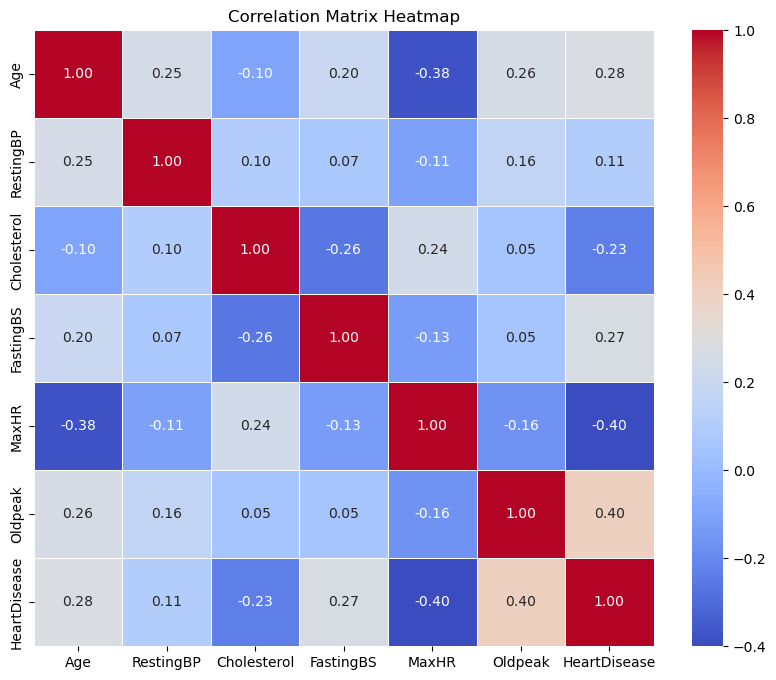

In [15]:
numerical_columns = df3.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

 Этот график служит для визуализации связей (корреляции) между числовыми переменными в наборе данных.

 Ячейки, в которых находятся значения корреляции, заполняются цветом. Интенсивность цвета отражает направление корреляционной связи между переменными.

 Используется цветовая шкала, чтобы показать степень корреляции. Теплые цвета обозначают положительную корреляцию, а холодные цвета - отрицательную корреляцию. Чем насыщеннее цвет, тем сильнее корреляция.
Главная цель тепловой карты корреляционной матрицы - выявить сильные корреляционные связи между переменными. Сильная корреляция может подсказать, какие переменные сильно взаимосвязаны и, возможно, могут быть исключены из анализа или учтены при принятии решений.

*Основные выводы по матрице корреляций:

- Сильная положительная корреляция: Если значение коэффициента корреляции близко к 1.0, это указывает на сильную положительную линейную связь между парами переменных. Например, можно проследить наибольшую связь между "HeartDisease" и "Age","FastingBS", "Oldpeak", что может означать, что на возникновениеи развитие сердечных заболеваний больше всего влияет возраст, уровень глюкозы в крови и стенокардия.

- Сильная отрицательная корреляция: Если значение коэффициента корреляции близко к -1.0, это указывает на слабую связь между парами переменных. Например, "HeartDisease" слабо коррелирован с "MaxHR" (коэффициент близок к -0.43), что может означать, что  высокий максимальный пульс никак не связан с наличием сердечного заболевания.

- Близкое к нулю или слабое значение корреляции: Значения, близкие к нулю, указывают на отсутствие линейной связи между переменными. Например, "RestingBP" и "Cholesterol" имеют коэффициент корреляции близкий к 0 (0.14), что может указывать на отсутствие сильной линейной связи между показателями давления и холестерина.

